In [154]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap


In [155]:

data=pd.read_excel('cancer2.xlsx')
X=data[['x1','x2']].values
Y=data[['Label']].values.flatten()
c0=data.where(data['Label']==0).values
c1=data.where(data['Label']==1).values

In [156]:
data.values[0][1:]

array([ 1.4096, -1.6306])

In [157]:
def euclidean(a,b):
    return np.sqrt(np.sum(a-b)**2)

def predict(sample,k):
    res=[]
    for x in sample:
        distances=[]
        for point in data.values:
            distance=euclidean(point[1:],x)
            distances.append([distance,point[0]])
        distances=sorted(distances)[1:k+1]
        distances=np.array(distances)
        values, counts = np.unique(distances.T[1], return_counts=True)
        label=np.argmax(counts)
        res.append(values[label])
    return np.array(res)


In [158]:
misclass=(predict(X,3)!=Y).sum()
resubError=misclass/X.shape[0]
resubError

0.11666666666666667

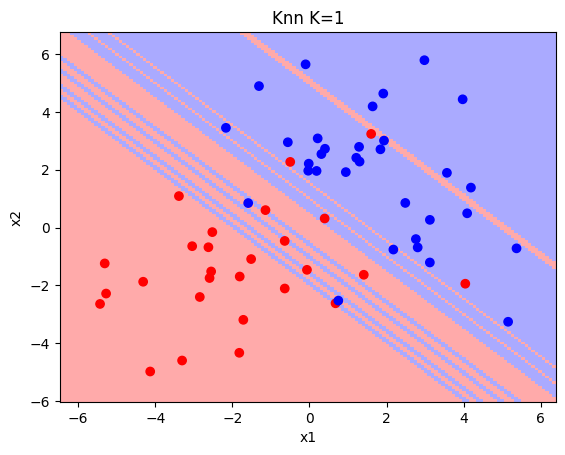

In [165]:
h=0.09

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
x_min, x_max = X.T[0].min() - 1, X.T[0].max() + 1
y_min, y_max = X.T[1].min() - 1, X.T[1].max() + 1

xx,yy =np.meshgrid(np.arange(x_min,x_max,h),
                   np.arange(y_min,y_max,h))

Z=predict(np.c_[xx.ravel(),yy.ravel()],1)

Z=Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
plt.title("Knn K=1")
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()
